In [1]:
import glob
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### Random Forest Classifier

In [ ]:
# df

In [ ]:
# X=df[['elv', 'asp', 'slp']] #features
# y=df['sd_bin'] #values

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# clf=RandomForestClassifier(n_estimators=100)

In [ ]:
# clf.fit(X_train, y_train)

In [ ]:
# y_pred=clf.predict(X_test)
# from sklearn import metrics
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# #feature importance
# feature_imp = pd.Series(clf.feature_importances_, index=df.columns[:3]).sort_values(ascending=False)
# feature_imp

In [ ]:
# # Creating a bar plot
# sns.barplot(x=feature_imp, y=feature_imp.index)
# # Add labels to your graph
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.legend()
# plt.show()

In [ ]:
# break

## RUN ALL FILES
functions

In [70]:
def prep_data(f, msk, elv, asp, slp):
    
    file_type = f.split('.')[-1]
    
    if file_type == 'asc':
        dep_ = np.loadtxt(f, skiprows=7) / 10                      #convert mm to cm
        dep = dep_.flatten()

        #filters: (1) Tuolumne Basin, (2) Snow Covered Areas
        elv = elv[(msk==1) & (dep>0)]
        asp = asp[(msk==1) & (dep>0)]
        slp = slp[(msk==1) & (dep>0)] 
        dep = dep[(msk==1) & (dep>0)]

        #standardize snow depth values
        sdv = (dep - dep.mean()) / dep.std()

        #dataframe
        d = {'elv': elv, 'asp': asp, 'slp': slp, 'sdv': sdv}                 #data to be put in df
        df_ = pd.DataFrame(d)                                                #create df
        df = df_.dropna()                                                    #remove all rows with any NaN's
        df.drop(df[df['asp'] < 0].index, inplace=True)                       #remove all -9999 in aspect values (i.e. the lakes, water bodies)

    elif file_type == 'npy':
        std_ = np.load(std_SDV_20m_path)
        std = std_.flatten()
    
        #filters: (1) Tuolumne Basin, (2) Snow Covered Areas
        elv = elv[msk==1]
        asp = asp[msk==1]
        slp = slp[msk==1] 
        std = std[msk==1]

        #dataframe
        d = {'elv': elv, 'asp': asp, 'slp': slp, 'sdv': std}                 #data to be put in df
        df_ = pd.DataFrame(d)                                                #create df
        df = df_.dropna()                                                    #remove all rows with any NaN's
        df.drop(df[df['asp'] < 0].index, inplace=True)                       #remove all -9999 in aspect values (i.e. the lakes, water bodies)

    
    return df

#~~~~ BINS 0-1 at 0.33 interval~~~~~
def bin_sd(x):
    if 0 <= x <= 0.33:
        return 0
    elif 0.33 < x <= 0.67:
        return 1
    elif 0.67 < x <= 1:
        return 2
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# # ~~~~ BINS 0-1 at 0.1 interval~~~~~
# def bin_sd(x):
#     if 0 <= x <= 0.1:
#         return 0
#     elif 0.1 < x <= 0.2:
#         return 1
#     elif 0.2 < x <= 0.3:
#         return 2
#     elif 0.3 < x <= 0.4:
#         return 3
#     elif 0.4 < x <= 0.5:
#         return 4
#     elif 0.5 < x <= 0.6:
#         return 5
#     elif 0.6 < x <= 0.7:
#         return 6
#     elif 0.7 < x <= 0.8:
#         return 7
#     elif 0.8 < x <= 0.9:
#         return 8
#     elif 0.9 < x <= 1.0:
#         return 9
#     elif x > 1.0:
#         return 10
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
def rfc(df):
    
    X=df[['elv', 'asp', 'slp']] #features
    y=df['sd_bin'] #values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #train/test split
    clf=RandomForestClassifier(n_estimators=20, max_depth=20, random_state=0)
    
    clf.fit(X_train, y_train)
    
    y_pred=clf.predict(X_test)

    acc = round(metrics.accuracy_score(y_test, y_pred) * 100) #accuracy 
    
    feature_imp = pd.Series(clf.feature_importances_, index=df.columns[:3]).sort_values(ascending=False) #feature importance

    featImp_elv = round(feature_imp['elv'] * 100)
    featImp_asp = round(feature_imp['asp'] * 100)
    featImp_slp = round(feature_imp['slp'] * 100)
    
#     print([('depth', est.get_depth(), 'max_tree_depth',  est.tree_.max_depth, 'max_depth', est.max_depth) for est in clf.estimators_])
    
    return acc, featImp_elv, featImp_asp, featImp_slp

# max_depths = [5,10,15,20]
# acc_list = []


# def rfc(df):
    
#     X=df[['elv', 'asp', 'slp']] #features
#     y=df['sd_bin'] #values

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #train/test split
    
#     for md in max_depths:
#         clf=RandomForestClassifier(n_estimators=50, max_depth=md)

#         clf.fit(X_train, y_train)

#         y_pred=clf.predict(X_test)

#         acc = round(metrics.accuracy_score(y_test, y_pred) * 100) #accuracy 
        

#         feature_imp = pd.Series(clf.feature_importances_, index=df.columns[:3]).sort_values(ascending=False) #feature importance

#         featImp_elv = round(feature_imp['elv'] * 100)
#         featImp_asp = round(feature_imp['asp'] * 100)
#         featImp_slp = round(feature_imp['slp'] * 100)
        
#         acc_list.append(acc)

#     return acc, featImp_elv, featImp_asp, featImp_slp, acc_list


### run ascii files

In [ ]:
# #import data
# msk_20m_path = '/Users/meganmason491/Documents/research/sierra/data/20m_analysis/terrain/tuolumne_msk_20m.asc'
# elv_20m_path = '/Users/meganmason491/Documents/research/sierra/data/20m_analysis/terrain/tuolumne_dem_20m.asc'
# asp_20m_path = '/Users/meganmason491/Documents/research/sierra/data/20m_analysis/terrain/tuolumne_asp_20m.asc'
# slp_20m_path = '/Users/meganmason491/Documents/research/sierra/data/20m_analysis/terrain/tuolumne_slp_20m.asc'
# dep_20m_path = '/Users/meganmason491/Documents/research/sierra/data/20m_analysis/ascii/*.asc' 
# years = list(range(2013, 2019))

# #handle 'fixed' terrain layers

# #open
# msk_ = np.loadtxt(msk_20m_path, skiprows=6)
# elv_ = np.loadtxt(elv_20m_path, skiprows=6)
# asp_ = np.loadtxt(asp_20m_path, skiprows=7) 
# slp_ = np.loadtxt(slp_20m_path, skiprows=7)

# #flatten
# msk = msk_.flatten()
# elv = elv_.flatten()
# asp = asp_.flatten()
# slp = slp_.flatten()

# flist = glob.glob(dep_20m_path)
# flist = [flist[i] for i in (0,7,18,30,42,49)] #just peak SDV

# #-------------------------------------------------------------------------------------------------------------


# dates = []
# accs = []
# featImp_elvs = []
# featImp_asps = []
# featImp_slps = []


# for i, f in enumerate(sorted(flist)):
              
                       
#     print('processing file {}:'.format(i), f.split('/')[-1])
    
#     dt_str = f.split("/")[-1] #splits on '/' and saves the last one
#     dt_str = "".join([c for c in dt_str if c.isnumeric()]) #grabs numeric values for date info
#     dates.append(dt_str[:-2]) #append to date list
    
#     df = prep_data(f, msk, elv, asp, slp)
    
#     df['sd_bin'] = df['sdv'].apply(bin_sd)
    
#     df = df.drop(['sdv'], axis=1)
    
#     acc, featImp_elv, featImp_asp, featImp_slp = rfc(df)
    
#     accs.append(acc)    
#     featImp_elvs.append(featImp_elv)
#     featImp_asps.append(featImp_asp)
#     featImp_slps.append(featImp_slp)
#     print('~~round complete~~')
    
# dates = pd.to_datetime(dates, format='%Y%m%d')

# print('COMPLETE!')


# #-------------------------------------------------------------------------------------------------------------

# dataframe = pd.DataFrame(list(zip(pd.to_datetime(dates), accs, featImp_elvs, featImp_asps, featImp_slps)),
#                         columns = ['Date', 'RFC Accuracy (%)', 'Elevation Importance (%)', 'Aspect Importance (%)', 'Slope Importance (%)'])
# dataframe
# dataframe.to_csv('/Users/meganmason491/Documents/research/sierra/analysis/results/tmp/SDV_peak_featureImportance.csv')


## run .npy file

In [74]:
#import data
msk_20m_path = '/Users/meganmason491/Documents/research/sierra/data/20m_analysis/terrain/tuolumne_msk_20m.asc'
elv_20m_path = '/Users/meganmason491/Documents/research/sierra/data/20m_analysis/terrain/tuolumne_dem_20m.asc'
asp_20m_path = '/Users/meganmason491/Documents/research/sierra/data/20m_analysis/terrain/tuolumne_asp_20m.asc'
slp_20m_path = '/Users/meganmason491/Documents/research/sierra/data/20m_analysis/terrain/tuolumne_slp_20m.asc'
# std_SDV_20m_path = '/Users/meganmason491/Documents/research/sierra/analysis/results/output/std_SDV_peak_woZeros.npy'
# std_SDV_20m_path = '/Users/meganmason491/Documents/research/sierra/analysis/results/output/std_SDV_2016_woZeros.npy'
# std_SDV_20m_path = '/Users/meganmason491/Documents/research/sierra/analysis/results/output/std_SDV_2015_woZeros.npy'
# ecdf_20m_path = '/Users/meganmason491/Documents/research/sierra/analysis/results/output/mean_peak_ecdf.npy'
# ecdf_20m_path = '/Users/meganmason491/Documents/research/sierra/analysis/results/output/range_peak_ecdf.npy'
# ecdf_20m_path = '/Users/meganmason491/Documents/research/sierra/analysis/results/output/mean_21at80sca_ecdf.npy' #21 ALS at 80% SCA
ecdf_20m_path = '/Users/meganmason491/Documents/research/sierra/analysis/results/output/range_21at80sca_ecdf.npy' #21 ALS at 80% SCA
std_SDV_20m_path = ecdf_20m_path
#handle 'fixed' terrain layers

#open
msk_ = np.loadtxt(msk_20m_path, skiprows=6)
elv_ = np.loadtxt(elv_20m_path, skiprows=6)
asp_ = np.loadtxt(asp_20m_path, skiprows=7) 
slp_ = np.loadtxt(slp_20m_path, skiprows=7)

#flatten
msk = msk_.flatten()
elv = elv_.flatten()
asp = asp_.flatten()
slp = slp_.flatten()

flist = glob.glob(std_SDV_20m_path)

#-------------------------------------------------------------------------------------------------------------
accs = []
featImp_elvs = []
featImp_asps = []
featImp_slps = []

for i, f in enumerate(sorted(flist)):
              
                       
    print('processing file {}:'.format(i), f.split('/')[-1])
    
    df = prep_data(f, msk, elv, asp, slp)
    
    df['sd_bin'] = df['sdv'].apply(bin_sd)
    
    df = df.drop(['sdv'], axis=1)
    
    acc, featImp_elv, featImp_asp, featImp_slp = rfc(df) #remove results, it's for parameter testing!!!!!
    
    accs.append(acc)    
    featImp_elvs.append(featImp_elv)
    featImp_asps.append(featImp_asp)
    featImp_slps.append(featImp_slp)
    print('~~round complete~~')

print('COMPLETE!')
#-------------------------------------------------------------------------------------------------------------

dataframe = pd.DataFrame(list(zip(accs, featImp_elvs, featImp_asps, featImp_slps)),
                        columns = ['RFC Accuracy (%)', 'Elevation Importance (%)', 'Aspect Importance (%)', 'Slope Importance (%)'])
dataframe
# dataframe.to_csv('/Users/meganmason491/Documents/research/sierra/analysis/results/tmp/std_SDV_of_peak_featureImportance.csv')
# dataframe.to_csv('/Users/meganmason491/Documents/research/sierra/analysis/results/tmp/std_SDV_of_2016_featureImportance.csv')
# dataframe.to_csv('/Users/meganmason491/Documents/research/sierra/analysis/results/tmp/std_SDV_of_2015_featureImportance.csv')

processing file 0: range_21at80sca_ecdf.npy


//anaconda3/envs/data_analysis/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


~~round complete~~
COMPLETE!


,RFC Accuracy (%),Elevation Importance (%),Aspect Importance (%),Slope Importance (%)
0,62.0,47.0,29.0,24.0


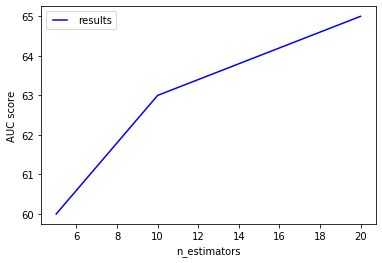

In [43]:
#tune parameters
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, acc_list, 'b', label='results')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

### TEST example of Random Forest Classifier

In [ ]:
# iris = datasets.load_iris()

In [ ]:
# data=pd.DataFrame({
#     'sepal length':iris.data[:,0],
#     'sepal width':iris.data[:,1],
#     'petal length':iris.data[:,2],
#     'petal width':iris.data[:,3],
#     'species':iris.target
# })
# data.head()

In [ ]:
# X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]
# y=data['species']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# #feature importance
# clf = RandomForestClassifier(n_estimators=100)
# clf.fit(X_train, y_train)

In [ ]:
# feature_imp= pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
# feature_imp

In [ ]:
# iris.feature_names

In [ ]:
# # Creating a bar plot
# sns.barplot(x=feature_imp, y=feature_imp.index)
# # Add labels to your graph
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.legend()
# plt.show()

#### TEST parameter tuning

In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv(“input/train.csv”)
print train.shape